# *LetsGrowMore - Virtual Internship Program*
#### *Data Science Tasks*

### *Author: Laxman Kumar*

### Task 1 - Iris Flowers Classification ML Project
This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

Datasetlink : http://archive.ics.uci.edu/ml/datasets/Iris

***

# 1. Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 2. Dataset Description

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Attribute Information:
<ol>
<li>Sepal length in cm</li>
<li>Sepal width in cm</li>
<li>Petal length in cm</li>
<li>Petal width in cm</li>
</ol>

Iris flower can be divided into 3 species as per the length and width of their Sepals and Petals:
<ol>
<li>Iris Setosa</li>
<li>Iris Versicolour</li>
<li>Iris Virginica</li>
</ol>

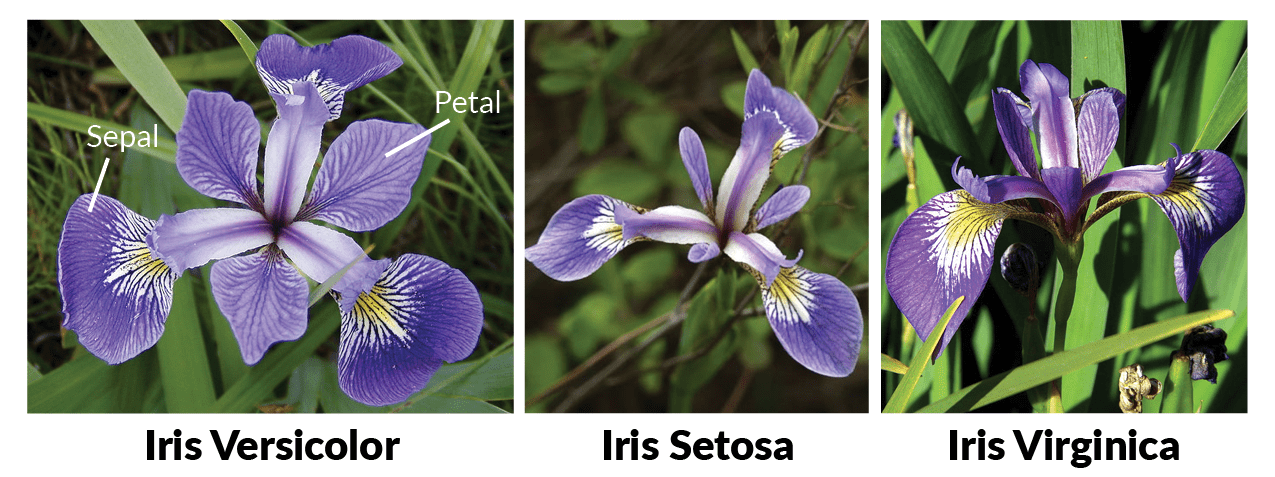

# 3. Loading the dataset

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# 4. Data Preprocessing

In [3]:
df.shape

(150, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:ylabel='Species'>

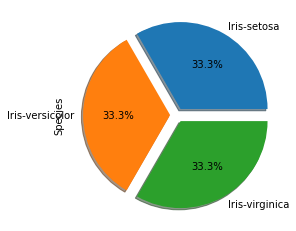

In [8]:
df['Species'].value_counts().plot(kind = 'pie',  autopct = '%1.1f%%', shadow = True, explode = [0.08,0.08,0.08])

In [9]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


# 5. Data Visualisation
## Scatter Plot

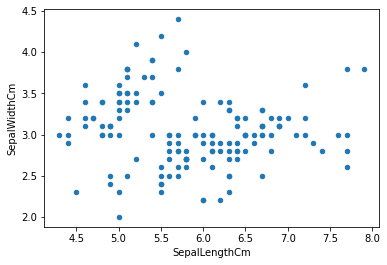

In [10]:
df.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm' )
plt.show()

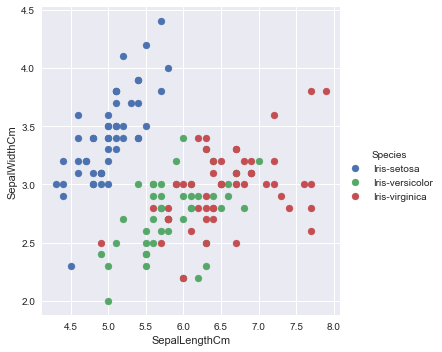

In [11]:
plt.style.use('seaborn')
sns.FacetGrid(df,hue='Species',height=5).\
            map(plt.scatter,'SepalLengthCm','SepalWidthCm')\
            .add_legend()

## Pair Plot

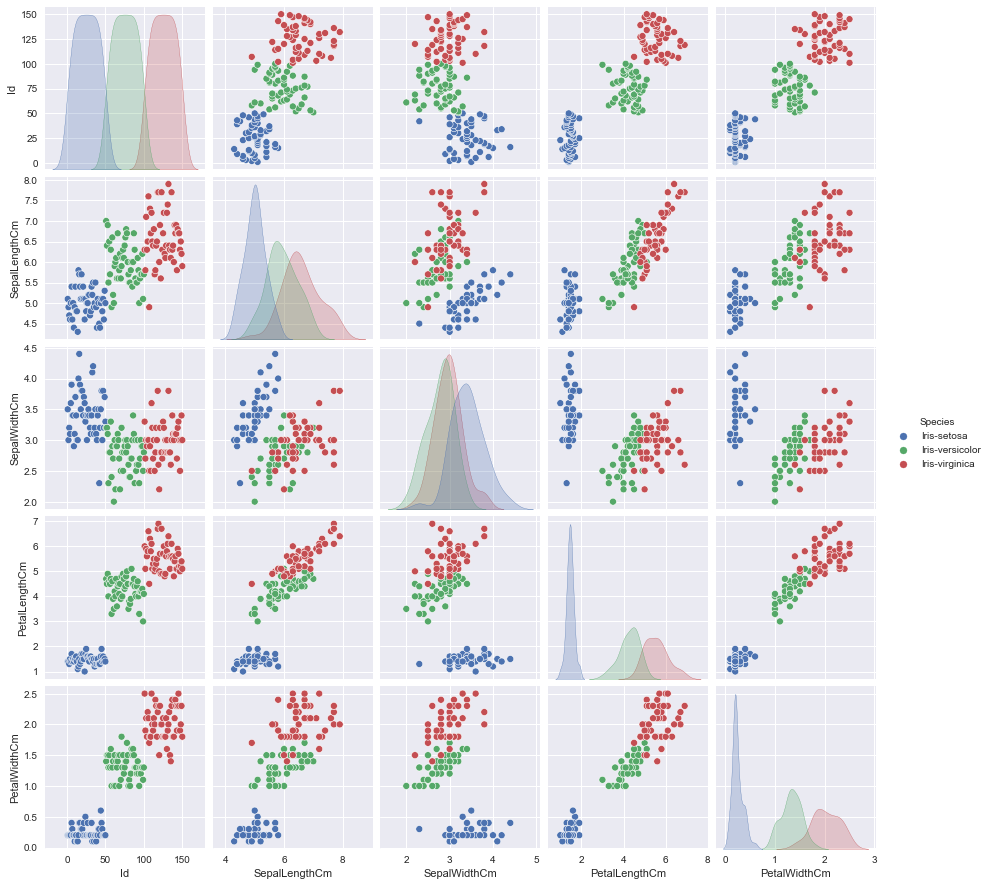

In [12]:
sns.pairplot(df,hue = 'Species')

## Heatmap

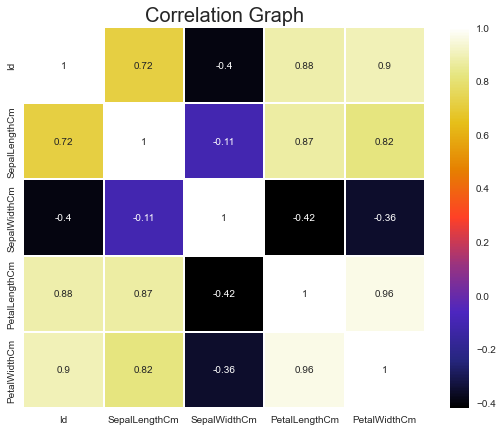

In [13]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),cmap='CMRmap',annot=True,linewidths=2)
plt.title("Correlation Graph",size=20)
plt.show()

## Box Plot

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

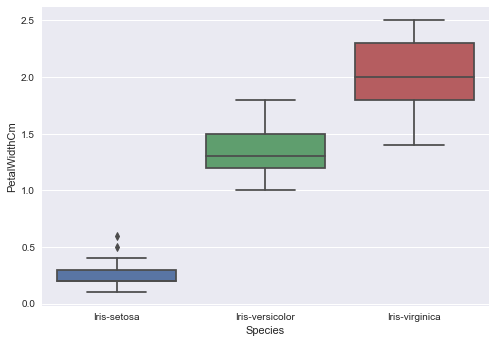

In [14]:
sns.boxplot(x="Species", y="PetalWidthCm", data=df)

# 6. Label encoding for categorical variables

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [16]:
# To display no. of samples on each class.
df['Species'].unique()

array([0, 1, 2])

# 7. Splitting X and y into Train and Test datasets

In [17]:
# Splitting dataset
from sklearn.model_selection import train_test_split

features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = df.loc[:, features].values
Y = df.Species

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 40,random_state=0)

In [18]:
print(X_Train.shape)
print(Y_Train.shape)
print(X_Test.shape)
print(Y_Test.shape)

(110, 4)
(110,)
(40, 4)
(40,)


# 8. DIFFERENT CLASSIFICATION MODELS

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_model= LogisticRegression(random_state = 0)
log_model.fit(X_Train, Y_Train)

LogisticRegression(random_state=0)

In [22]:
y_pred=log_model.predict(X_Test)
print("Accuracy:",accuracy_score(Y_Test, y_pred)*100)

Accuracy: 97.5


## Support Vector Machine

In [23]:
from sklearn import svm
model=svm.SVC()
model.fit(X_Train,Y_Train)

SVC()

In [24]:
y_pred=model.predict(X_Test)
print("Accuracy:",accuracy_score(y_pred,Y_Test)*100)

Accuracy: 97.5


## Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_Train,Y_Train)

RandomForestClassifier()

In [26]:
y_pred=model.predict(X_Test)
print("Accuracy:",accuracy_score(y_pred,Y_Test)*100)

Accuracy: 97.5


## Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=16)
model.fit(X_Train,Y_Train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=16)

In [28]:
y_pred=model.predict(X_Test)
print("Accuracy:",accuracy_score(y_pred,Y_Test)*100)

Accuracy: 97.5


## K Nearest Neighbors Classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_Train,Y_Train)

KNeighborsClassifier()

In [30]:
y_pred=model.predict(X_Test)
print("Accuracy:",accuracy_score(y_pred,Y_Test)*100)

Accuracy: 97.5


## Naive Bayes Classifier

In [31]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_Train,Y_Train)

GaussianNB()

In [32]:
y_pred=model.predict(X_Test)
print("Accuracy:",accuracy_score(y_pred,Y_Test)*100)

Accuracy: 100.0


***

# 10. Model Evaluation Results

| Model || Accuracy Score |
| :---: || :---:|
| Logistic Regression || 97.5 |
| SVM || 97.5 |
| Random Forest || 97.5 |
| Decision Tree || 97.5 |
| KNN(K-Nearest Neighbours) || 97.5 |
| Naive Bayes || 100.0 |

We got highest accuracy Score of 100 for Naive Bayes

***

# 11. Conclusions

* Our dataset was not very large and consisted of only 150 rows, with all the 3 species uniformly distributed.


* PetalWidthCm was highly correlated with PetalLengthCm


* PetalLengthCm was highly correlated with PetalWidthCm


* We tried with 6 different machine learning Classification models on the Iris Test data set to classify the flower into it's three species:
    1. Iris Setosa
    2. Iris Versicolour
    3. Iris Virginica,<br>
based on the length and width of the flower's Petals and Sepals.


* We got very high accuracy score for all the models, and even the accuracy score of 100 for KNN and SVM with Linear Kernel models with some hyper parameter tuning maybe due to small size of dataset.

# THANK YOU!!